In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [269]:
with open('bank-additional-full.csv', 'r', encoding='UTF-8') as file:
    a = ''
    for line in file:
        t = ','.join(line.split(';'))
        a+=t
    print(a)
    with open('bank-full.csv', 'w', encoding='UTF-8') as f:
        f.write(a)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
df = pd.read_csv('bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [273]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [20]:
df['y_num'] = df['y'].apply(lambda x: 1 if x=='yes' else 0)

In [21]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_num
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


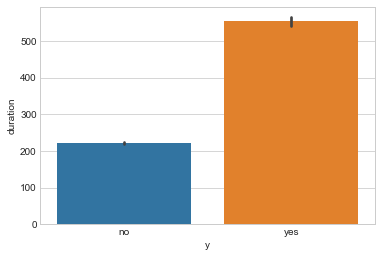

In [9]:
sns.barplot(x='y',y='duration',data=df)

In [7]:
df.corr()['duration']

age              -0.000866
duration          1.000000
campaign         -0.071699
pdays            -0.047577
previous          0.020640
emp.var.rate     -0.027968
cons.price.idx    0.005312
cons.conf.idx    -0.008173
euribor3m        -0.032897
nr.employed      -0.044703
Name: duration, dtype: float64

c:\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


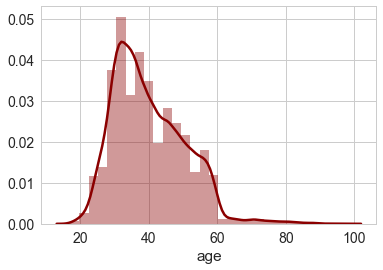

In [45]:
sns.set_context("notebook", font_scale=1.4, rc={"lines.linewidth": 2.5})
sns.set_style('whitegrid')
sns.distplot(df['age'],color='darkred',bins=30)

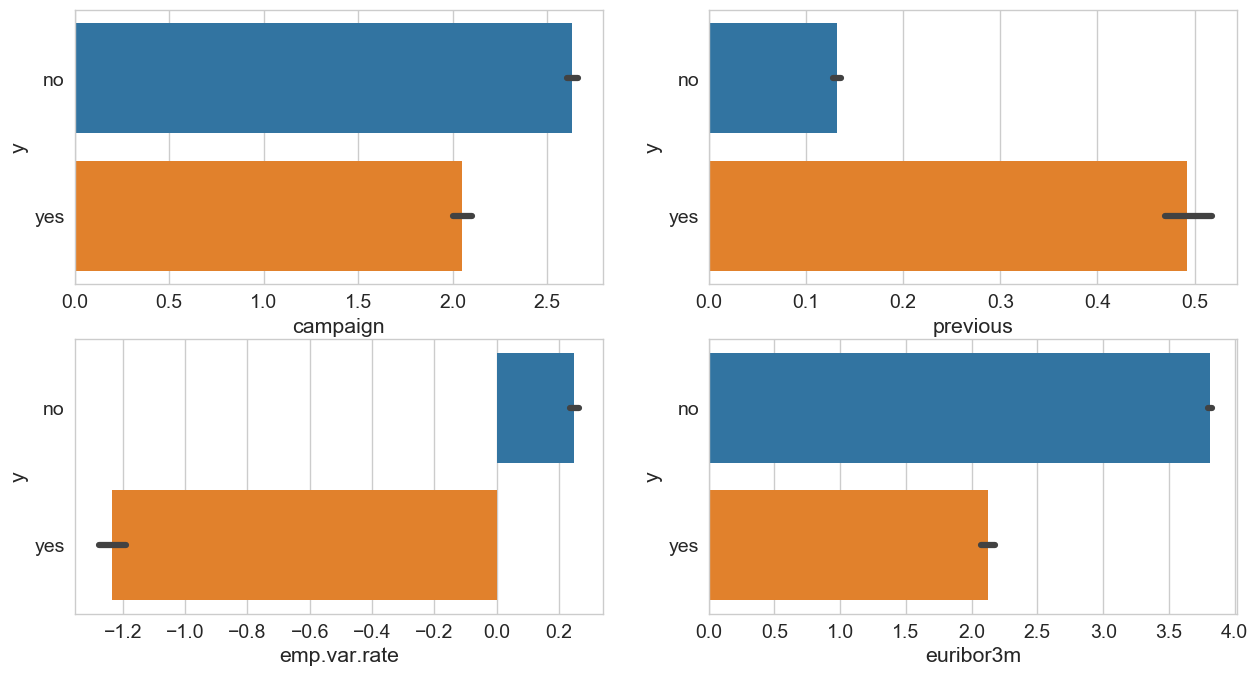

In [59]:
plt.figure(figsize=(15,8), dpi=100)
plt.subplot(2,2,1)
sns.barplot(x='campaign',y='y',data=df)
plt.subplot(2,2,2)
sns.barplot(x='previous',y='y',data=df)
plt.subplot(2,2,3)
sns.barplot(x='emp.var.rate',y='y',data=df)
plt.subplot(2,2,4)
sns.barplot(x='euribor3m',y='y',data=df)



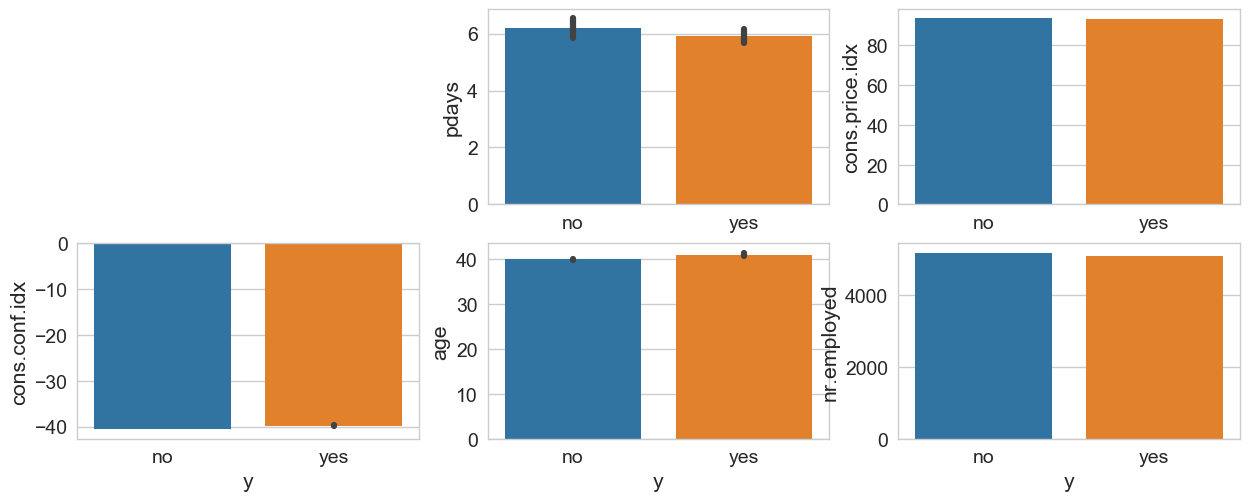

In [78]:
plt.figure(figsize=(15,15), dpi=100)
plt.subplot(5,3,5)
sns.barplot(x='y',y='pdays',data=df[df['pdays']!=999])
plt.subplot(5,3,6)
sns.barplot(x='y',y='cons.price.idx',data=df)
plt.subplot(5,3,7)
sns.barplot(x='y',y='cons.conf.idx',data=df)
plt.subplot(5,3,8)
sns.barplot(x='y',y='age',data=df)
plt.subplot(5,3,9)
sns.barplot(x='y',y='nr.employed',data=df)

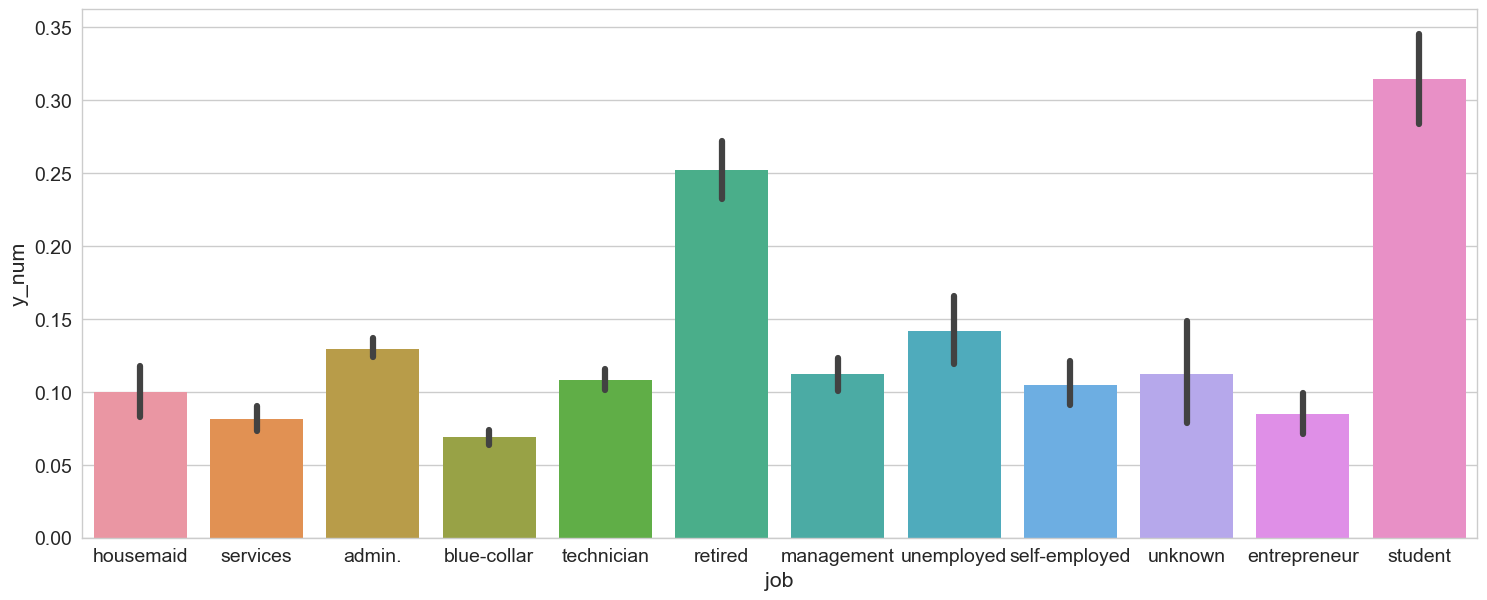

In [63]:
df['y_num'] = df['y'].apply(lambda x: 1 if x=='yes' else 0)
fig = plt.figure(figsize=(18,7), dpi=100)
sns.barplot(x='job',y='y_num',data=df)

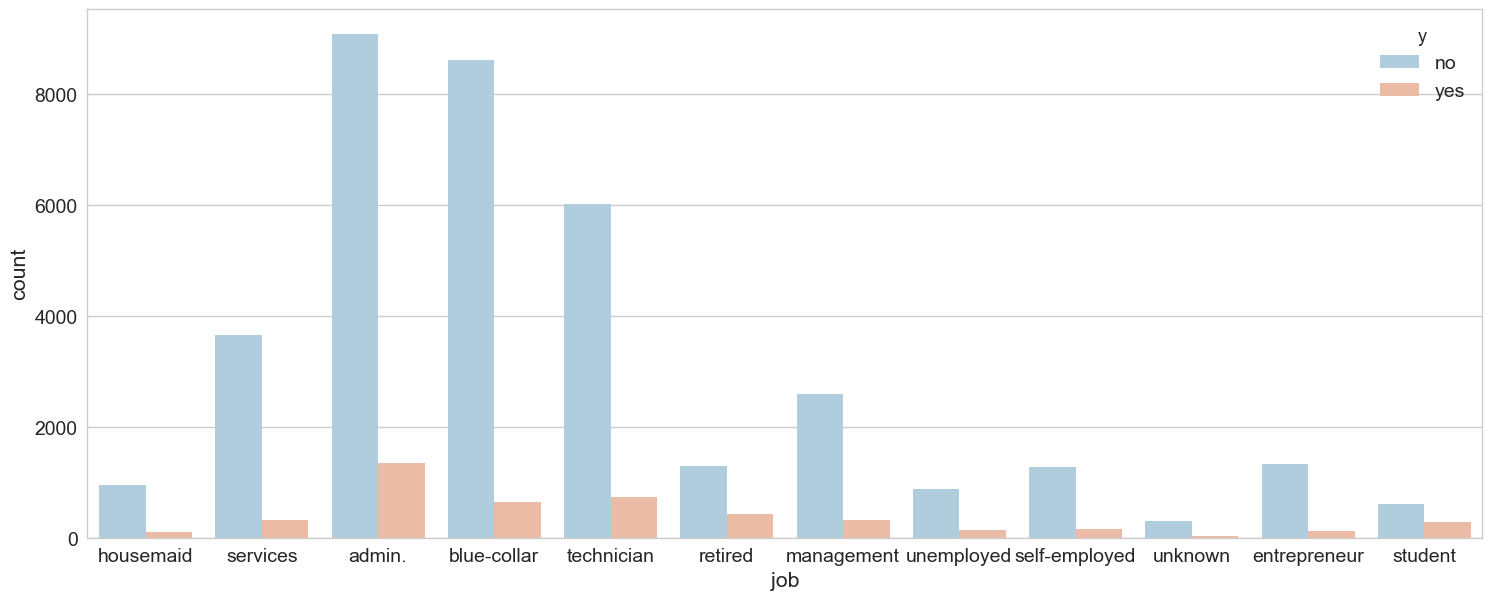

In [64]:
fig = plt.figure(figsize=(18,7), dpi=100)
sns.countplot(x='job',hue='y',data=df,palette='RdBu_r')

In [23]:
job_group = df.groupby('job')

In [24]:
job_group.mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_num
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


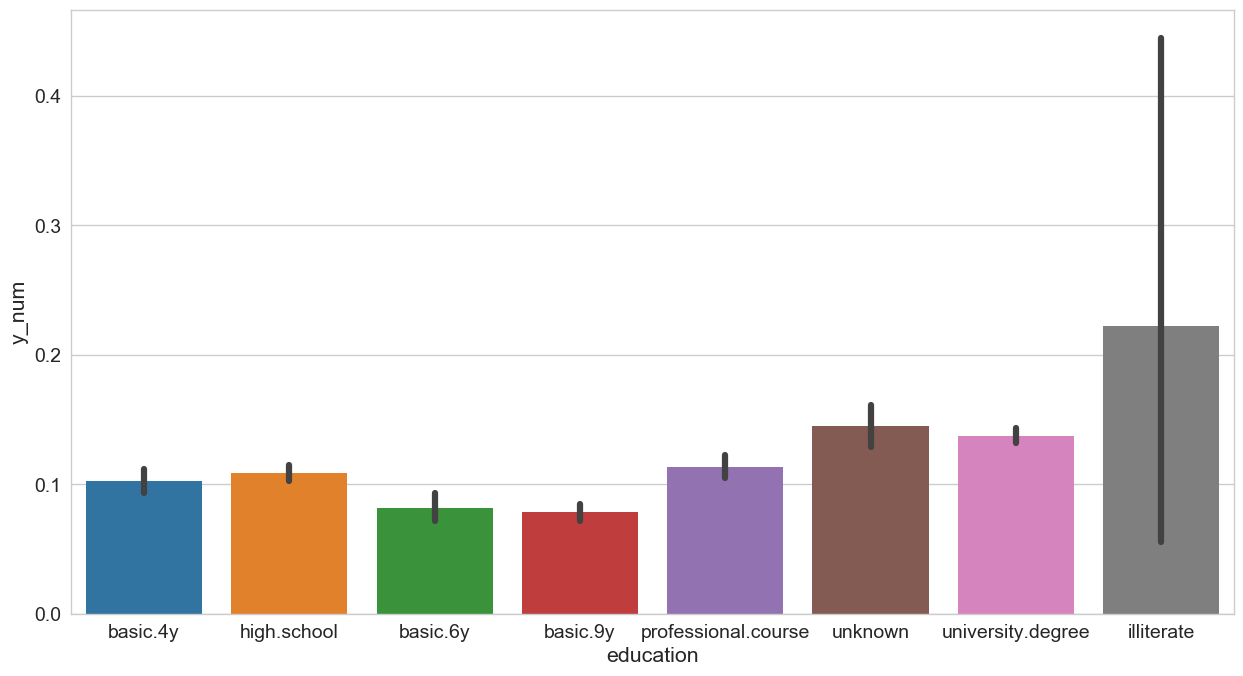

In [54]:
fig = plt.figure(figsize=(15,8), dpi=100)
sns.barplot(x='education',y='y_num',data=df)

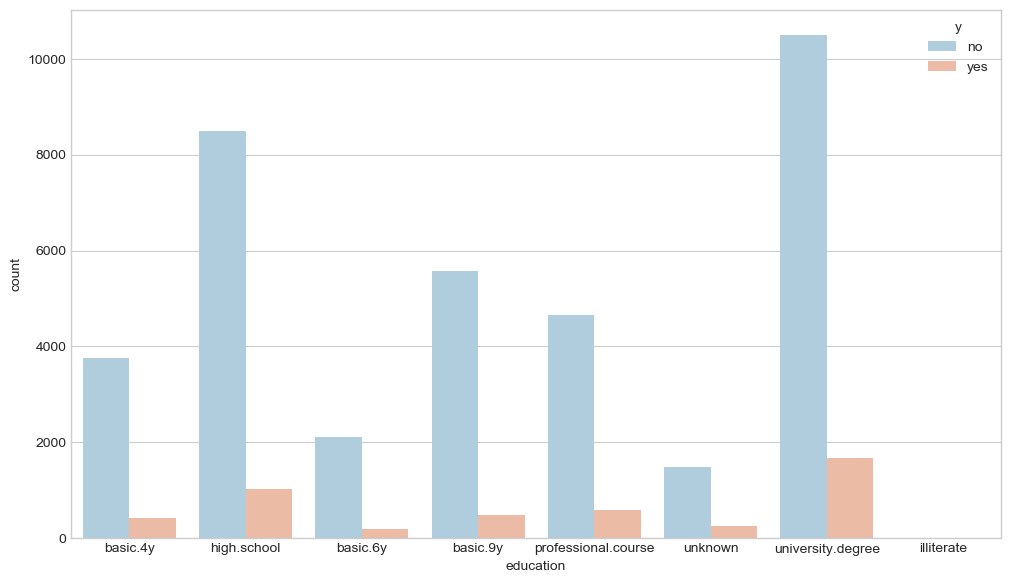

In [277]:
fig = plt.figure(figsize=(12,7), dpi=100)
sns.countplot(x='education',hue='y',data=df,palette='RdBu_r')

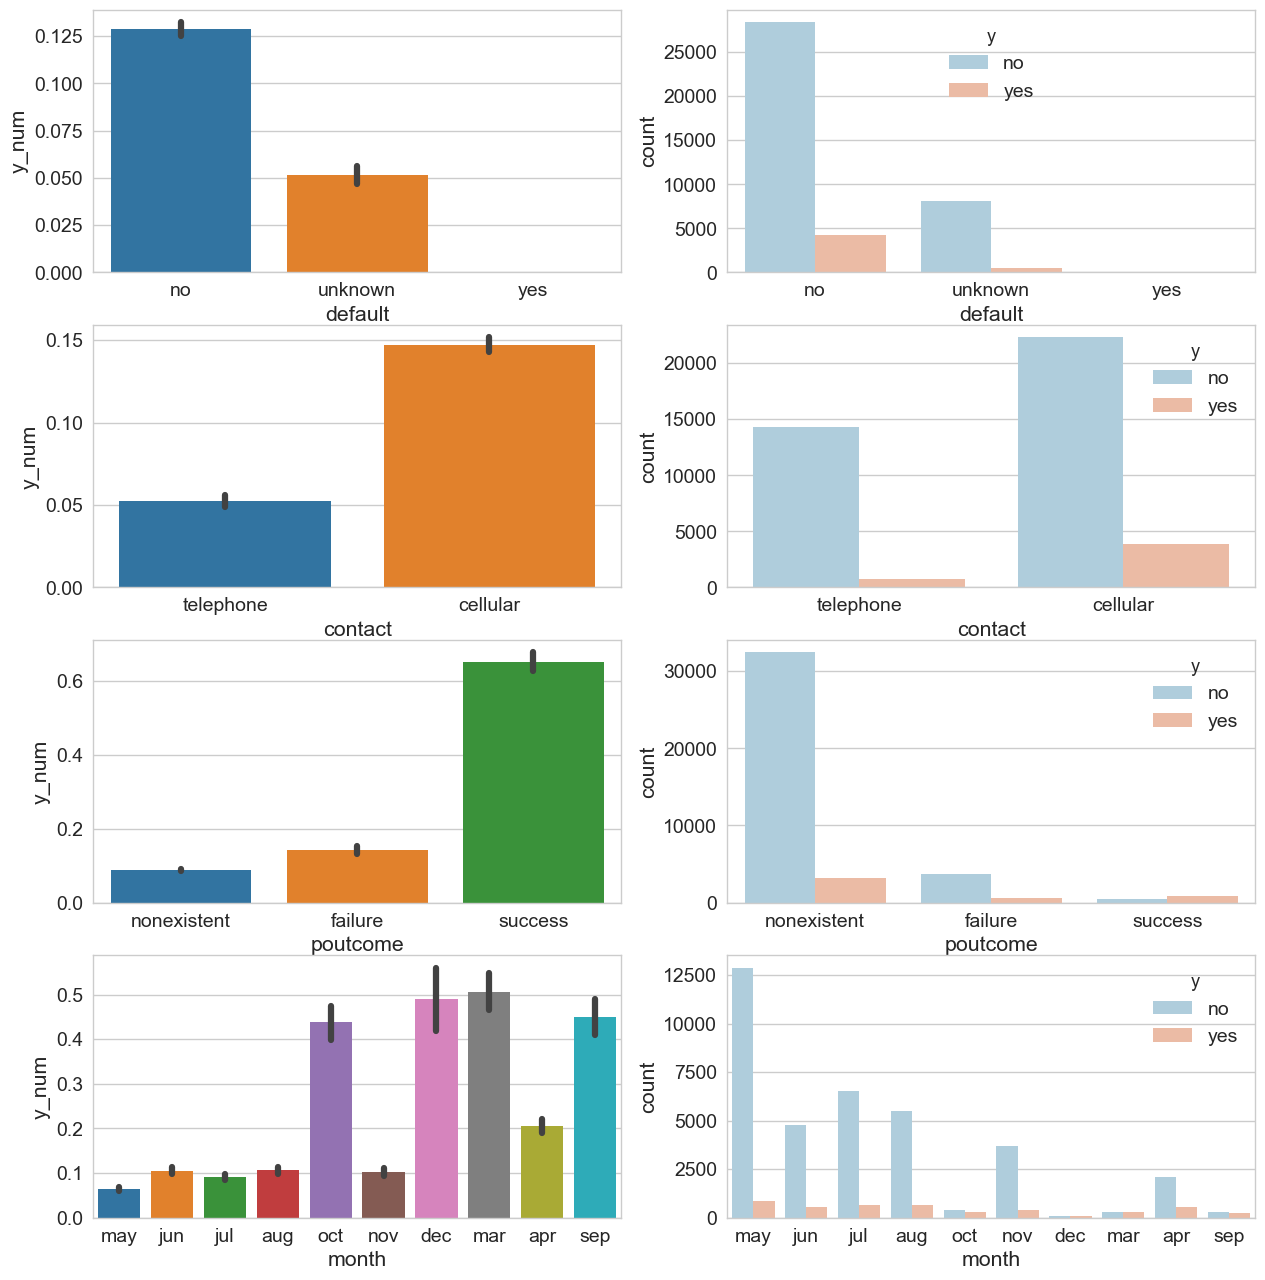

In [75]:
fig = plt.figure(figsize=(15,16), dpi=100)
plt.subplot(4,2,1)
sns.barplot(x='default',y='y_num',data=df)
plt.subplot(4,2,2)
sns.countplot(x='default',hue='y',data=df,palette='RdBu_r')
plt.subplot(4,2,3)
sns.barplot(x='contact',y='y_num',data=df)
plt.subplot(4,2,4)
sns.countplot(x='contact',hue='y',data=df,palette='RdBu_r')
plt.subplot(4,2,5)
sns.barplot(x='poutcome',y='y_num',data=df)
plt.subplot(4,2,6)
sns.countplot(x='poutcome',hue='y',data=df,palette='RdBu_r')
plt.subplot(4,2,7)
sns.barplot(x='month',y='y_num',data=df)
plt.subplot(4,2,8)
sns.countplot(x='month',hue='y',data=df,palette='RdBu_r')


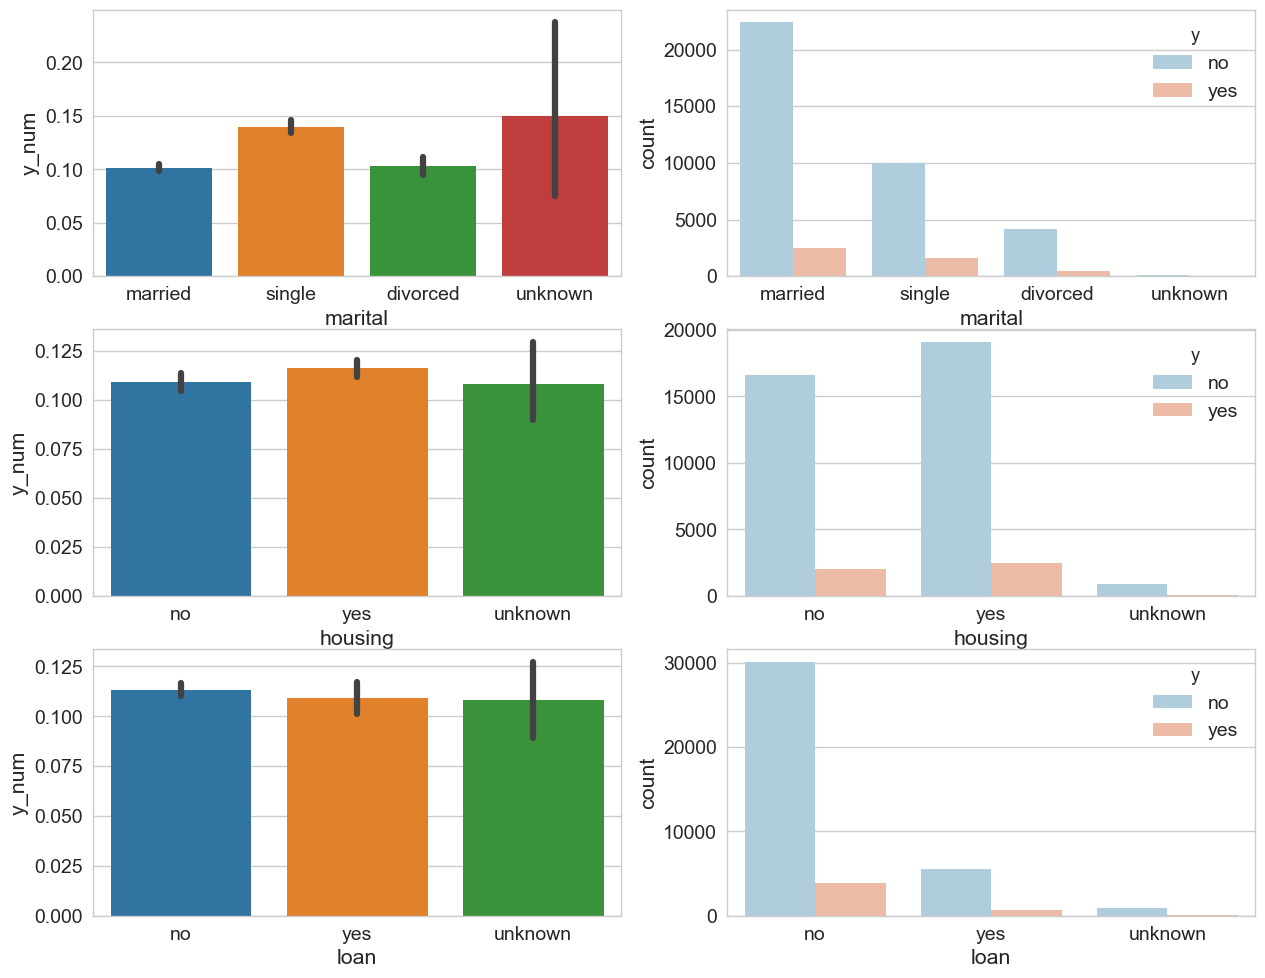

In [80]:
fig = plt.figure(figsize=(15,12), dpi=100)
plt.subplot(3,2,1)
sns.barplot(x='marital',y='y_num',data=df)
plt.subplot(3,2,2)
sns.countplot(x='marital',hue='y',data=df,palette='RdBu_r')
plt.subplot(3,2,3)
sns.barplot(x='housing',y='y_num',data=df)
plt.subplot(3,2,4)
sns.countplot(x='housing',hue='y',data=df,palette='RdBu_r')
plt.subplot(3,2,5)
sns.barplot(x='loan',y='y_num',data=df)
plt.subplot(3,2,6)
sns.countplot(x='loan',hue='y',data=df,palette='RdBu_r')

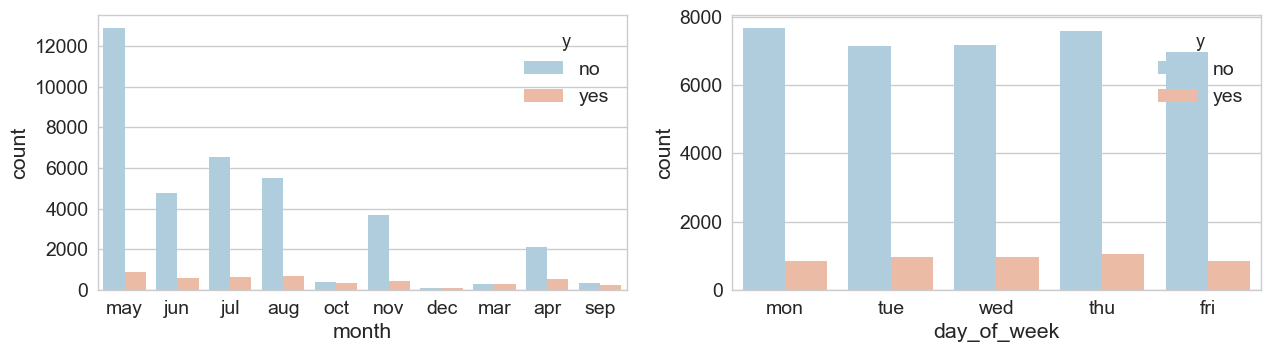

In [71]:
fig = plt.figure(figsize=(15,8), dpi=100)
plt.subplot(2,2,1)
sns.countplot(x='month',hue='y',data=df,palette='RdBu_r')
plt.subplot(2,2,2)
sns.countplot(x='day_of_week',hue='y',data=df,palette='RdBu_r')

In [81]:
print(list(df.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_num']


In [82]:
df_short = df.drop(['cons.price.idx', 'cons.conf.idx','duration', 'nr.employed', 'y', 'day_of_week', 'y_num'], axis = 1)

In [83]:
df_short.head()

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,euribor3m
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,1,999,0,nonexistent,1.1,4.857
1,57,services,married,high.school,unknown,no,no,telephone,may,1,999,0,nonexistent,1.1,4.857
2,37,services,married,high.school,no,yes,no,telephone,may,1,999,0,nonexistent,1.1,4.857
3,40,admin.,married,basic.6y,no,no,no,telephone,may,1,999,0,nonexistent,1.1,4.857
4,56,services,married,high.school,no,no,yes,telephone,may,1,999,0,nonexistent,1.1,4.857


In [84]:
df_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 15 columns):
age             41188 non-null int64
job             41188 non-null object
marital         41188 non-null object
education       41188 non-null object
default         41188 non-null object
housing         41188 non-null object
loan            41188 non-null object
contact         41188 non-null object
month           41188 non-null object
campaign        41188 non-null int64
pdays           41188 non-null int64
previous        41188 non-null int64
poutcome        41188 non-null object
emp.var.rate    41188 non-null float64
euribor3m       41188 non-null float64
dtypes: float64(2), int64(4), object(9)
memory usage: 3.3+ MB


In [85]:
job = pd.get_dummies(df_short['job'],drop_first=True)
marital = pd.get_dummies(df_short['marital'],drop_first=True)
education = pd.get_dummies(df_short['education'],drop_first=True)
default = pd.get_dummies(df_short['default'],drop_first=True)
housing = pd.get_dummies(df_short['housing'],drop_first=True)
loan = pd.get_dummies(df_short['loan'],drop_first=True)
contact = pd.get_dummies(df_short['contact'],drop_first=True)
month = pd.get_dummies(df_short['month'],drop_first=True)
poutcome = pd.get_dummies(df_short['poutcome'],drop_first=True)

In [86]:
df_short = df_short.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], axis = 1)

In [112]:
df_transformed = pd.concat([df_short,job,marital,education,default,housing,loan,contact,month,poutcome],axis=1)

In [113]:
df_transformed.head()

,age,campaign,pdays,previous,emp.var.rate,euribor3m,blue-collar,entrepreneur,housemaid,management,...,dec,jul,jun,mar,may,nov,oct,sep,nonexistent,success
0,56,1,999,0,1.1,4.857,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,57,1,999,0,1.1,4.857,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,37,1,999,0,1.1,4.857,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,40,1,999,0,1.1,4.857,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,56,1,999,0,1.1,4.857,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [138]:
df_short = df_short.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], axis = 1)
df_transformed = pd.concat([df_short,job,marital,education,default,housing,loan,contact,month,poutcome],axis=1)
df_transformed_short = pd.concat([df_short,job,marital,default,contact,poutcome],axis=1)

In [139]:
df_transformed_short.head()

,age,campaign,pdays,previous,emp.var.rate,euribor3m,blue-collar,entrepreneur,housemaid,management,...,unemployed,unknown,married,single,unknown,unknown,yes,telephone,nonexistent,success
0,56,1,999,0,1.1,4.857,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
1,57,1,999,0,1.1,4.857,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
2,37,1,999,0,1.1,4.857,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,40,1,999,0,1.1,4.857,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,56,1,999,0,1.1,4.857,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_short)
scaled_features = scaler.transform(df_short)
df_feat = pd.DataFrame(scaled_features,columns=df_short.columns)
standard_df_transformed_short = pd.concat([df_feat,job,marital,default,contact,poutcome],axis=1)

In [119]:
df_feat.head()

,age,campaign,pdays,previous,emp.var.rate,euribor3m
0,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.71246
1,1.628993,-0.565922,0.195414,-0.349494,0.648092,0.71246
2,-0.290186,-0.565922,0.195414,-0.349494,0.648092,0.71246
3,-0.002309,-0.565922,0.195414,-0.349494,0.648092,0.71246
4,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.71246


In [149]:
standard_df_transformed_short = pd.concat([df_feat,job,marital,default,contact,poutcome],axis=1)

In [150]:
standard_df_transformed_short.head()

,age,campaign,pdays,previous,emp.var.rate,euribor3m,blue-collar,entrepreneur,housemaid,management,...,unemployed,unknown,married,single,unknown,unknown,yes,telephone,nonexistent,success
0,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.71246,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
1,1.628993,-0.565922,0.195414,-0.349494,0.648092,0.71246,0,0,0,0,...,0,0,1,0,0,1,0,1,1,0
2,-0.290186,-0.565922,0.195414,-0.349494,0.648092,0.71246,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,-0.002309,-0.565922,0.195414,-0.349494,0.648092,0.71246,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,1.533034,-0.565922,0.195414,-0.349494,0.648092,0.71246,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_transformed, 
                                                    df['y'], test_size=0.30, 
                                                    random_state=101)

In [202]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [205]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[10866   112]
 [ 1112   267]]


             precision    recall  f1-score   support

         no       0.91      0.99      0.95     10978
        yes       0.70      0.19      0.30      1379

avg / total       0.88      0.90      0.87     12357



In [133]:
d = {'y_test': y_test, 'predictions': predictions}
t = pd.DataFrame(data=d)
result_yes = t[t['y_test']=='yes']
print(len(result_yes))
print(len(result_yes[result_yes['y_test']==result_yes['predictions']]))

1379
271


In [142]:
sX_train, sX_test, sy_train, sy_test = train_test_split(df_transformed_short, 
                                                    df['y'], test_size=0.30, 
                                                    random_state=101)

In [143]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(sX_train,sy_train)
predictions = logmodel.predict(sX_test)

In [144]:
print(confusion_matrix(sy_test,predictions))
print('\n')
print(classification_report(sy_test,predictions))

[[10856   122]
 [ 1108   271]]


             precision    recall  f1-score   support

         no       0.91      0.99      0.95     10978
        yes       0.69      0.20      0.31      1379

avg / total       0.88      0.90      0.87     12357



In [151]:
stsX_train, stsX_test, stsy_train, stsy_test = train_test_split(standard_df_transformed_short, 
                                                    df['y'], test_size=0.30, 
                                                    random_state=101)

In [152]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(stsX_train,stsy_train)
predictions = logmodel.predict(stsX_test)

In [153]:
print(confusion_matrix(stsy_test,predictions))
print('\n')
print(classification_report(stsy_test,predictions))

[[10862   116]
 [ 1116   263]]


             precision    recall  f1-score   support

         no       0.91      0.99      0.95     10978
        yes       0.69      0.19      0.30      1379

avg / total       0.88      0.90      0.87     12357



In [178]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(sX_train,sy_train)
pred = knn.predict(sX_test)

In [182]:
print(confusion_matrix(sy_test,pred))
print('\n')
print(classification_report(sy_test,pred))

[[10045   933]
 [  963   416]]


             precision    recall  f1-score   support

         no       0.91      0.92      0.91     10978
        yes       0.31      0.30      0.30      1379

avg / total       0.85      0.85      0.85     12357



In [339]:
import numpy as np
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(sX_train,sy_train)
    pred_i = knn.predict(sX_test)
    error_rate.append(np.mean(pred_i != sy_test))

KeyboardInterrupt: 

In [341]:
error_rate = []
def collect_err_rate(i):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(sX_train,sy_train)
    pred_i = knn.predict(sX_test)
    error_rate.append(np.mean(pred_i != sy_test))
    print(i + 'done')
# Will take some time
import concurrent.futures
with concurrent.futures.ThreadPoolExecutor(max_workers=5) as executor:
    for i in range(1,40):
        executor.submit(collect_err_rate, i) 

KeyboardInterrupt: 

Text(0,0.5,'Error Rate')

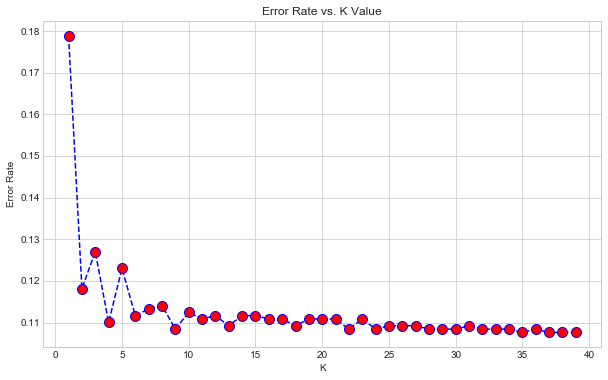

In [230]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [342]:
# NOW WITH K=12
knn = KNeighborsClassifier(n_neighbors=12)

knn.fit(sX_train,sy_train)
pred = knn.predict(sX_test)

print('WITH K=12')
print('\n')
print(confusion_matrix(sy_test,pred))
print('\n')
print(classification_report(sy_test,pred))

WITH K=12


[[10816   162]
 [ 1097   282]]


             precision    recall  f1-score   support

         no       0.91      0.99      0.95     10978
        yes       0.64      0.20      0.31      1379

avg / total       0.88      0.90      0.87     12357



In [183]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(stsX_train,stsy_train)
pred = knn.predict(stsX_test)

In [184]:
print(confusion_matrix(sy_test,pred))
print('\n')
print(classification_report(sy_test,pred))

[[10041   937]
 [  944   435]]


             precision    recall  f1-score   support

         no       0.91      0.91      0.91     10978
        yes       0.32      0.32      0.32      1379

avg / total       0.85      0.85      0.85     12357



In [185]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(sX_train,sy_train)
predictions = dtree.predict(sX_test)

In [186]:
print(confusion_matrix(sy_test,predictions))
print('\n')
print(classification_report(sy_test,predictions))

[[9982  996]
 [ 915  464]]


             precision    recall  f1-score   support

         no       0.92      0.91      0.91     10978
        yes       0.32      0.34      0.33      1379

avg / total       0.85      0.85      0.85     12357



In [187]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(sX_train, sy_train)
rfc_pred = rfc.predict(sX_test)

In [190]:
print(confusion_matrix(sy_test,rfc_pred))
print('\n')
print(classification_report(sy_test,rfc_pred))

[[10534   444]
 [  983   396]]


             precision    recall  f1-score   support

         no       0.91      0.96      0.94     10978
        yes       0.47      0.29      0.36      1379

avg / total       0.87      0.88      0.87     12357



In [196]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(standard_df_transformed_short)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [197]:
kmeans.cluster_centers_

array([[ 1.50511664e-02,  9.35974342e-02,  1.95413900e-01,
        -3.43142686e-01,  6.76729403e-01,  6.99220161e-01,
         2.35901039e-01,  3.76835176e-02,  2.99545135e-02,
         7.11142339e-02,  2.91039533e-02,  3.53537221e-02,
         9.86280093e-02,  7.02636737e-03,  1.75881069e-01,
         2.34088976e-02,  9.13427758e-03,  6.36293037e-01,
         2.45700973e-01,  1.70112052e-03,  2.63192929e-01,
         7.39617618e-05,  5.06712030e-01,  9.96856625e-01,
         7.82707232e-15],
       [-2.87692507e-02, -1.78904942e-01, -3.73519988e-01,
         6.55893218e-01, -1.29352087e+00, -1.33651038e+00,
         2.03223298e-01,  3.08899413e-02,  1.76715912e-02,
         7.07570510e-02,  6.59503782e-02,  3.28691595e-02,
         9.20336467e-02,  4.84201598e-02,  1.40453806e-01,
         2.69315049e-02,  5.86696826e-03,  5.45840107e-01,
         3.48059659e-01,  2.40333640e-03,  1.04615820e-01,
         7.06863646e-05,  9.48611013e-02,  6.08397540e-01,
         9.70523786e-02]])

In [198]:
def converter(cluster):
    if cluster=='yes':
        return 1
    else:
        return 0

In [199]:
df['Cluster'] = df['y'].apply(converter)

In [200]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))
[[7718, 3246], 
 [394, 997]]

[[25727 10821]
 [ 1316  3324]]
             precision    recall  f1-score   support

          0       0.95      0.70      0.81     36548
          1       0.23      0.72      0.35      4640

avg / total       0.87      0.71      0.76     41188



In [217]:
a = [[25727, 10821],
 [ 1316,  3324]]
[list(map(lambda x:int(x*0.3), a[0])),list(map(lambda x:int(x*0.3), a[1]))]

[[7718, 3246], [394, 997]]

In [ ]:
kmeans.fit(standard_df_transformed_short)

In [355]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [356]:
from sklearn.metrics import confusion_matrix,classification_report

In [357]:
print(confusion_matrix(y_test,predictions))

[[10859   119]
 [ 1110   269]]


In [358]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

         no       0.91      0.99      0.95     10978
        yes       0.69      0.20      0.30      1379

avg / total       0.88      0.90      0.87     12357



In [200]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [201]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8898128898128899, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8896982310093653, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=rbf, score=0.890625, total=   1.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8898128898128899, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8896982310093653, total=   0.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..... C=0.1, gamma=0.1, kernel=rbf, score=0.890625, total=   0.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8981288981288982, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.899063475546306, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8989583333333333, total=   0.2s
[CV] C=0.1, gamma=0.001, kernel=rbf ..............

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.9053069719042663, total=   1.1s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.8979166666666667, total=   1.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.8877338877338877, total=   1.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.890738813735692, total=   1.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...... C=1000, gamma=1, kernel=rbf, score=0.890625, total=   1.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.8690228690228691, total=   0.4s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.8657648283038502, total=   0.4s
[CV] C=1000, gamma=0.1, kernel=rbf .......

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [202]:
grid.best_params_

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [203]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [204]:
grid_predictions = grid.predict(X_test)

In [205]:
print(confusion_matrix(y_test,grid_predictions))

[[1076   26]
 [ 107   27]]


In [209]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

         no       0.91      0.98      0.94      1102
        yes       0.51      0.20      0.29       134

avg / total       0.87      0.89      0.87      1236

